In [48]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [49]:
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np

In [50]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [51]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [52]:
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [53]:
#sklearn expects i/p to be 2d array-model.fit(x_train,y_train)=>reshape to 2d array
nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny*nrgb))

In [54]:
#so,eventually,model.predict() should also be a 2d input
nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny*nrgb))

# Random Forest Classifier


In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
model=RandomForestClassifier()

In [57]:
model.fit(x_train2,y_train.ravel())

RandomForestClassifier()

In [58]:
y_pred=model.predict(x_test2)
y_pred

array([2, 8, 8, ..., 3, 4, 7], dtype=uint8)

In [59]:
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.55      0.54      0.54      1023
           1       0.54      0.51      0.53      1062
           2       0.33      0.38      0.35       866
           3       0.29      0.34      0.31       842
           4       0.40      0.39      0.39      1021
           5       0.40      0.42      0.41       944
           6       0.55      0.47      0.51      1174
           7       0.44      0.51      0.47       867
           8       0.61      0.57      0.59      1070
           9       0.54      0.48      0.51      1131

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.46     10000
weighted avg       0.47      0.46      0.47     10000



In [60]:
cm = confusion_matrix(y_pred,y_test)


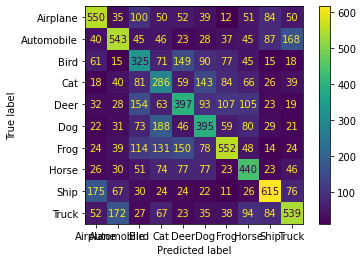

In [61]:
from sklearn import metrics

cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels =["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"])
cm_plot.plot()
plt.show()

# K Neighbors Classifier

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
knn=KNeighborsClassifier(n_neighbors=7)

In [64]:
knn.fit(x_train2,y_train)

/Users/lizakukreja/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [65]:
y_pred_knn=knn.predict(x_test2)
y_pred_knn

array([2, 8, 8, ..., 5, 6, 4], dtype=uint8)

In [66]:
accuracy_score(y_pred_knn,y_test)
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.52      0.40      0.45      1299
           1       0.20      0.70      0.30       280
           2       0.44      0.22      0.29      2013
           3       0.20      0.28      0.23       707
           4       0.52      0.23      0.32      2222
           5       0.20      0.40      0.27       504
           6       0.27      0.35      0.30       761
           7       0.20      0.70      0.31       281
           8       0.69      0.39      0.50      1749
           9       0.14      0.73      0.23       184

    accuracy                           0.34     10000
   macro avg       0.34      0.44      0.32     10000
weighted avg       0.45      0.34      0.35     10000



In [67]:
cm1 = confusion_matrix(y_pred_knn,y_test)

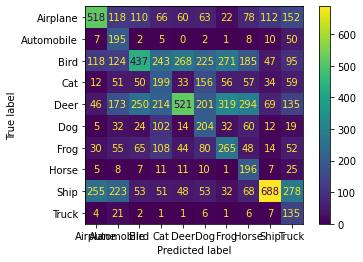

In [68]:
cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels =["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"])
cm_plot.plot()
plt.show()